In [1]:
import pandas as pd

In [2]:
# 구글 데이터 셋에서 공개된 것을 활용하여 데이터를 불러오기 
train = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
test = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_test.csv", sep=",")
train.shape, test.shape

((17000, 9), (3000, 9))

In [3]:
# 자료형과 결측치를 확인해 보자.
print(train.info() )
print()
print(test.info() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   

In [4]:
# 직관적으로 결측치 확인하기
print(train.isnull().sum())
print()
print(test.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [5]:
# 데이터들의 요약값을 살펴보자.
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

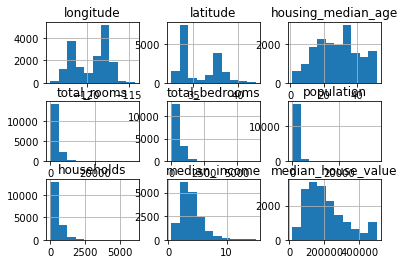

In [7]:
# 판다스는 시각화
train.hist()

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

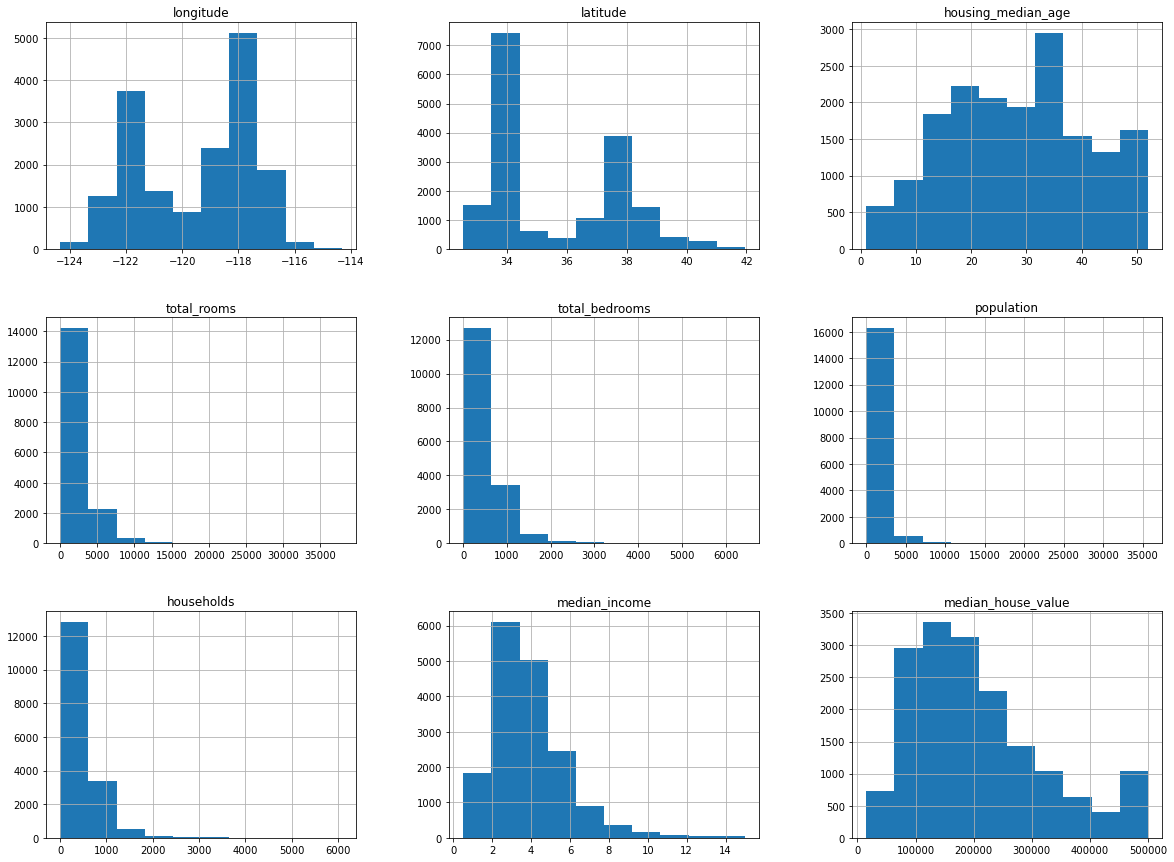

In [8]:
train.hist(figsize=(20,15))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

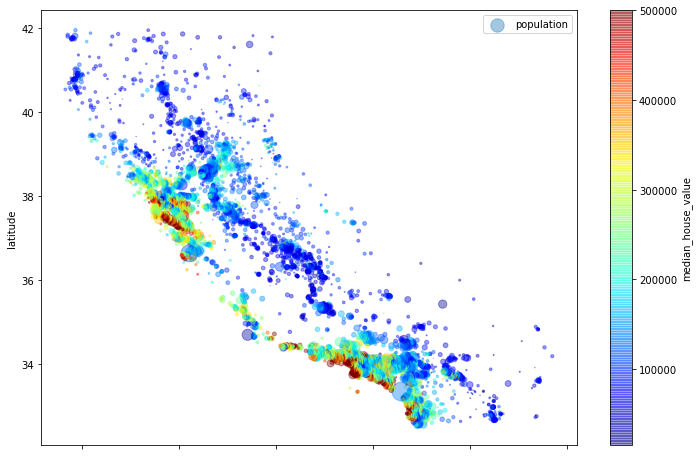

In [9]:
### 위도 경도에 따른 산점도 분포
train.plot(kind="scatter",
           x="longitude", y="latitude",
           alpha=0.4, s=train["population"]/100,
           label="population", c="median_house_value",
           figsize=(12,8),
           cmap=plt.get_cmap("jet"), colorbar=True)

In [11]:
sel = ['total_rooms', 'total_bedrooms', 'population']

temp_train = train[ sel ]

print("데이터 가공 셋의 크기 : ", temp_train.shape)
print("데이터 가공 셋의 일부 : ")
print(temp_train.head())

데이터 가공 셋의 크기 :  (17000, 3)
데이터 가공 셋의 일부 : 
   total_rooms  total_bedrooms  population
0       5612.0          1283.0      1015.0
1       7650.0          1901.0      1129.0
2        720.0           174.0       333.0
3       1501.0           337.0       515.0
4       1454.0           326.0       624.0


In [12]:
import seaborn as sns

<AxesSubplot:xlabel='population'>

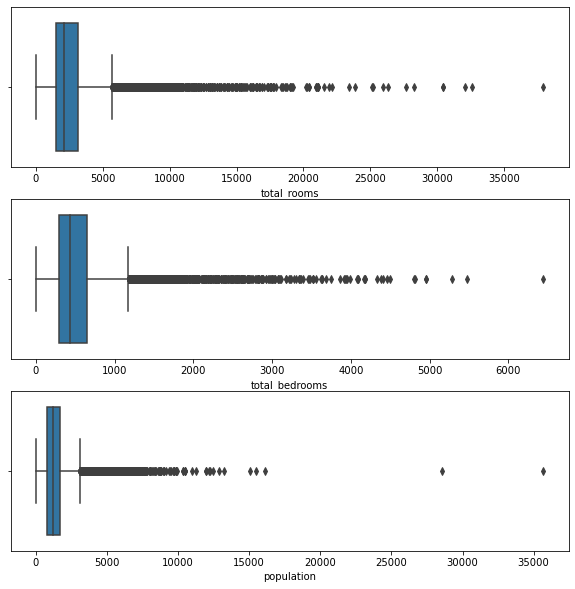

In [13]:
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
sns.boxplot(x="total_rooms", data=temp_train)

plt.subplot(3,1,2)
sns.boxplot(x="total_bedrooms", data=temp_train)

plt.subplot(3,1,3)
sns.boxplot(x="population", data=temp_train)

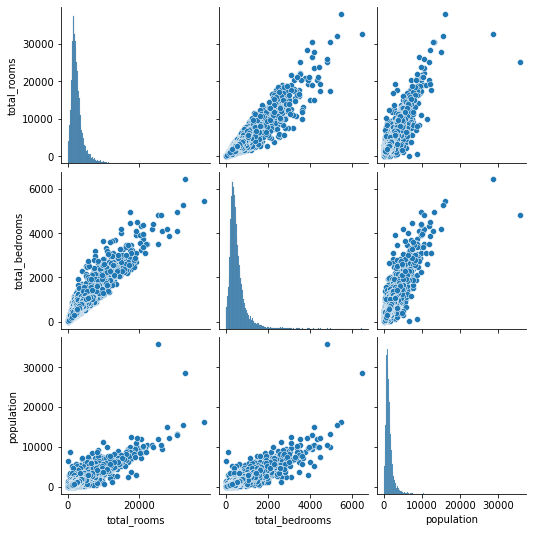

In [14]:
sns.pairplot(temp_train)

<AxesSubplot:xlabel='median_house_value'>

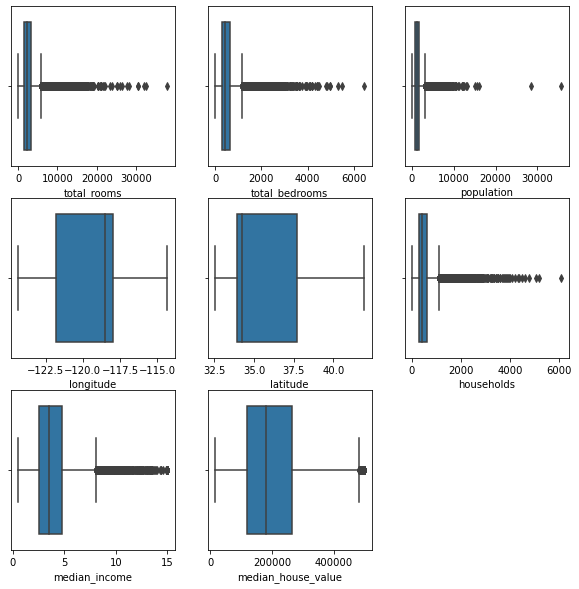

In [16]:
plt.figure(figsize=(10,10))

plt.subplot(3,3,1)
sns.boxplot(x="total_rooms", data=train)
plt.subplot(3,3,2)
sns.boxplot(x="total_bedrooms", data=train)
plt.subplot(3,3,3)
sns.boxplot(x="population", data=train)

plt.subplot(3,3,4)
sns.boxplot(x="longitude", data=train)
plt.subplot(3,3,5)
sns.boxplot(x="latitude", data=train)
plt.subplot(3,3,6)
sns.boxplot(x="households", data=train)

plt.subplot(3,3,7)
sns.boxplot(x="median_income", data=train)
plt.subplot(3,3,8)
sns.boxplot(x="median_house_value", data=train)

<AxesSubplot:xlabel='total_bedrooms'>

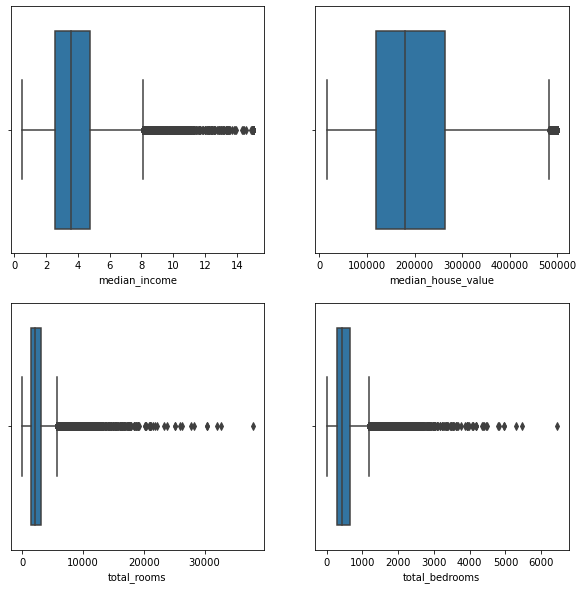

In [17]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.boxplot(x="median_income", data=train)
plt.subplot(2,2,2)
sns.boxplot(x="median_house_value", data=train)

plt.subplot(2,2,3)
sns.boxplot(x="total_rooms", data=train)
plt.subplot(2,2,4)
sns.boxplot(x="total_bedrooms", data=train)

In [18]:
## 두 컬럼 선택
temp02 = train.loc[:, [ "median_income", "median_house_value" ] ]
temp02.head()

,median_income,median_house_value
0,1.4936,66900.0
1,1.8200,80100.0
2,1.6509,85700.0
3,3.1917,73400.0
4,1.9250,65500.0


In [18]:
train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [19]:
## 두 컬럼 선택 8열, 9열
temp03 = train.iloc[:,  [7, 8] ]
print( temp03.head() )

print()

temp03 = train.iloc[:,  [-2, -1] ]
print( temp03.head() ) 

   median_income  median_house_value
0         1.4936             66900.0
1         1.8200             80100.0
2         1.6509             85700.0
3         3.1917             73400.0
4         1.9250             65500.0

   median_income  median_house_value
0         1.4936             66900.0
1         1.8200             80100.0
2         1.6509             85700.0
3         3.1917             73400.0
4         1.9250             65500.0


#### room level 찾아보기